# COGS 108 - Final Project

# Overview

Through our research and analysis, we wanted to investigate whether the number of alcohol licenses in a certain zip code of San Diego county would correlate with more crime in San Diego. Since we are all students going to school here in San Diego, choosing the county of San Diego would would be able to provide relevant information that could possibly help us in our lives while living in this area. As a result, we would want to see if alcohol consumption would correlate more to criminality such as DUIs, petty thefts, thefts, etc.. 

# Names
 - Neghena Faizyar
 - Jie Wang
 - Richard To
 - Brianna Catalan
 - Nicholas Weaver

# Research Question

Is there a correlation between crimes (such as theft, assault, disturbing the peace, dui, vandalism, and vehicle break-ins) and the location and areas which sell alcohol (areas which have more alcohol licenses) in the San Diego area?

# Background and Prior Work

As college students living in an urban and metropolitan area, the club and bar scene (or to better specify, the drinking scene) is abundant and no secret. San Diego in particular is renowned for its party scene; Gaslamp district, Pacific Beach, North Park, etc. Accordingly, with the plentiful number of colleges residing in San Diego County, the youth populates these locations.

As such, we were curious to investigate whether there was a significant number of crime in San Diego County due to the seemingly ample number of locations serving alcohol. Often, we see that alcohol consumption is stereotyped as being related to criminality. The Alcohol Rehab Guide claims, "alcohol plays a large role in criminal activities and violence." This is similar to views among many. Respectively, Pacific Beach - a crowd favorite -  is one of the highest crime neighborhoods in San Diego. The San Diego Reader states that “[m]ost of the violent crime is alcohol-related and occurs in the ‘bar-district,’ [...] in that area there are 10 times more alcohol licenses than allowed by state guidelines.” It is interesting to read two sources, one general and one more specific making the claim and or implication that there is a relationship between alcohol and crime. 

There has been a decent amount of research since the late 20th century on whether there really lies a relationship between these two variables. The Bureau of Justice conducted a national data analysis in 1998 on the prevalence of alcohol involvement in crime. The study found that about 36% of convicted offenders were drinking at the time of their offence; about two-thirds of these crimes were categorized as simple assaults (Alcohol and Crime). Another study conducted in 2010, sought to determine whether the density of alcohol outlets had a relationship with violent crime in those outlets. The study examined data from the 2000 Washington, DC census, they found that “alcohol outlet density is significantly associated with the violent crimes”; these crimes were most commonly categorized as robbery, assault, and sexual offences (Alcohol Outlets and Violent Crime in Washington D.C.). 

Although these studies found that there is some relationship between alcohol consumption and crime, they conducted their research using data from different locations in the U.S and are in a sense outdated as the data used was from 20 or so years ago. Additionally, our project is exploring data from San Diego County; which in 2018, the San Diego Union Tribune claimed that San Diego has the lowest crime rate of the big metropolitan cities. This is surprising as there are so many alcohol outlets found within the county due to the rich night-life. Therefore, we aim to determine whether this relationship does exist in modern times and is applicable to the region (San Diego County) we are looking at. Furthermore, the previous studies conducted, examine a range of crime from “simple assaults” to “violent crime” and there is no clear definition for what those categories are constituted as. For the sake of our project, we will be looking at “petty crime,” which will consist of “theft/larceny,” “assault,” “disturbing the peace,” “drug alcohol violations,” “DUI,” “vandalism,” and “vehicle break-in.”

Ultimately, the relationship that we are researching is often defined as a “stereotype”; thus, we wanted to see if there is truth to this “stereotype” in modern day San Diego County. We aim to determine if there truly is a positive correlation between alcohol consumption and crime rates and possibly test for causation to see if areas which don't sell alcohol have lower crime rates in general. 

References (include links):
 - 1) https://www.alcoholrehabguide.org/alcohol/crimes/ 
 - 2) https://www.sandiegoreader.com/news/2018/feb/12/ticker-pacific-beachs-high-crime-problem/#
 - 3) https://www.bjs.gov/content/pub/pdf/ac.pdf
 - 4) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2941368/
 - 5) https://www.sandiegouniontribune.com/news/public-safety/sd-me-fbi-crime-20180925-story.html

# Hypothesis
Our hypothesis is that there is a positive correlation between areas that sell alcohol and crime rates. Meaning, the more alcohol is sold in an area, the higher the crime rate.

# Dataset(s)

 - Dataset Name: Licensing Reports 
 - Link to the dataset: https://www.abc.ca.gov/licensing/licensing-reports/
 - Number of observations: 122,086 observations (number of alcohol licenses reported)
 - Description: This dataset is a dataset of reports for licenses given from the CA Department of Alcoholic Beverage Control. We obtained the Data Export which is updated daily for license information. Some important columns for this dataset is the columns: [License Type, Lic or App, Type Status, Prem Zip]. Each row is a different alchohol license. 
 <br>
 <br>
 - Dataset Name: Public Crime Data Extract
 - Link to the dataset: https://www.sandag.org/index.asp?classid=14&subclassid=21&projectid=446&fuseaction=projects.detail
 - Number of observations: 61,604 observations (crimes reported)
 - Description: This dataset is a dataset of crimes reported within San Diego given by SANDAG. It is the most recent 180 days of San Diego regional crime data. This data contains the columns: [Crime, agency, Description, activityDate, BLOCK_ADDRESS, ZipCode, community]. Each row is a different crime reported. 

Since we have multiple datasets, we plan to combine these datasets by merging the two dataframes through the zip codes. We will find the counts of alcohol licenses (Licensing Reports df) and use these frequencies in order to see how places with higher counts of licenses affect the counts of crimes as well as types of crimes (Public Crime Data Extract df).    

# Setup

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

import patsy
import statsmodels.api as sm

### Import Crime Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/COGS108/group025_wi20/master/ARJISPublicCrime030420.txt?token=AL64AM2CUKSURKDZTYF3E2K6PJ6JE'
                     ,names=['Crime', 'agency', 'Description', 'activityDate', 'BLOCK_ADDRESS', 'ZipCode', 'community'])
print(df.shape)
df.head()

(61604, 7)


,Crime,agency,Description,activityDate,BLOCK_ADDRESS,ZipCode,community
0,CM_LEGEND,agency,Charge_Description_Orig,activityDate,BLOCK_ADDRESS,ZipCode,community
1,THEFT/LARCENY,OCEANSIDE,PETTY THEFT(All Other Larceny) (M),12/29/2019 18:11:00,1800 BLOCK COLLEGE BOULEVARD,92056,OCEANSIDE
2,THEFT/LARCENY,CHULA VISTA,PETTY THEFT(Shoplift) (M),1/2/2020 20:15:00,600 BLOCK PALOMAR STREET,91911,CHULA VISTA
3,DUI,SAN DIEGO,DUI ALC/0.08 PERCENT (M),1/1/2020 2:36:00,4000 BLOCK RUEDA DRIVE,92124,SAN DIEGO
4,MOTOR VEHICLE THEFT,CHULA VISTA,TAKE VEHICLE W/O OWNER'S CONSENT/VEHICLE THEFT...,1/6/2020 17:00:00,1200 BLOCK ATWATER STREET,91913,CHULA VISTA


In [3]:
#Import Alcohol Licence Data
alc = pd.read_csv("https://raw.githubusercontent.com/COGS108/group025_wi20/master/ABC_WeeklyDataExport.csv?token=AL64AM3OZ5NIEXT63MMC22C6PJ6KU")
print(alc.shape)
alc.head()

(122086, 26)


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,License Type,File Number,Lic or App,Type Status,Type Orig Iss Date,Expir Date,Fee Codes,Dup Counts,Master Ind,Term in # of Months,...,Prem State,Prem Zip,DBA Name,Mail Addr 1,Mail Addr 2,Mail City,Mail State,Mail Zip,Prem County,Prem Census Tract #
0,20,585942,LIC,ACTIVE,29-Mar-18,31-Aug-20,,,Y,12,...,CA,94558-7551,INTERVINE INC,,,,,,NAPA,2010.05
1,21,590293,LIC,ACTIVE,29-Mar-18,29-Feb-20,,,Y,12,...,CA,95112-2414,EL DORADO LIQUOR & MARKET,,,,,,SANTA CLARA,5031.12
2,41,589231,LIC,ACTIVE,29-Mar-18,29-Feb-20,,,Y,12,...,CA,95134,GO FISH POKE BAR,,,,,,SANTA CLARA,5050.06
3,20,584534,LIC,ACTIVE,29-Mar-18,30-Nov-20,,,Y,12,...,CA,95112-3015,EL SOL MARKET,,,,,,SANTA CLARA,5001
4,41,584534,LIC,ACTIVE,29-Mar-18,30-Nov-20,,,Y,12,...,CA,95112-3015,EL SOL MARKET,,,,,,SANTA CLARA,5001


### Import Legend for Alcohol Licences

In [4]:
legend = pd.read_csv('https://raw.githubusercontent.com/COGS108/group025_wi20/master/License%20Types.csv?token=AL64AM7XH5SPPPILLZEGZTS6PJ6MU')
legend = legend[['License Number', 'License Type']]
leg_dict = dict(zip(legend['License Number'], legend['License Type']))
legend.head()

,License Number,License Type
0,1,Beer Manufacturer
1,2,Winegrower
2,3,Brandy Manufacturer
3,4,Distilled Spirits Manufacturer
4,5,Distilled Spirits Manufacturer’s Agent


# Data Cleaning

In this section we cleaned both of our datasets. 

For the Crime dataset, we first narrowed the type of crimes to theft, assault, disturbing the peace, dui, vandalism, and vehicle break-ins. Additionally, we then cleaned the datasets by dropping the rows that do not have the type of crimes we are looking for. We then dropped the columns which we felt would be privacy violations or columns that we don't find useful. These columns for the crime dataset were 'activityDate', 'BLOCK_ADDRESS', 'community', and 'agency'. 

For the Alcohol License dataset, we filtered through the dataset by finding only active licenses so we removed any rows that was still an application or any rows that was no longer active. We then grabbed the columns we felt would be useful which were 'License Type', 'Geo Code', 'Prem Zip'. The rest of the columns were not useful for the analysis we were looking to do. Some of the zip codes in this dataset had 9 digits and were in string form, so we cleaned it to only include the first 5 digits instead. Then we created a new DataFrame where we checked if the zip codes were contained in our crime dataset, as we are only interested in the licenses in San Diego.

### Clean Up Crime Data

In [5]:
def find_alc_crime(description):
    description = description.lower()
    
    if 'theft' in description:
        description = True
    elif 'assault' in description:
          description = True
    elif 'disturbing' in description:
          description = True
    elif 'dui' in description:
          description = True
    elif 'vandalism' in description:
          description = True
    elif 'vehicle break-in' in description:
          description = True
    else:
        description = False

    return description

In [6]:
# Save the zip codes to use during cleaning of the alcohol df
zip_codes = df['ZipCode'].dropna().unique() 

In [7]:
# Find only the crimes we want to look at
df['ALC_related'] = df['Crime'].apply(find_alc_crime)
df = df.dropna(subset=['ZipCode'])
# Drop the crimes we don't want to look at
drop_indices = df.index[df['ALC_related'] == False].tolist()
df_ALC = df.drop(drop_indices, axis=0)
# Drop columns which might be privacy violations as well as columns that we don't find useful.
df_ALC = df_ALC.drop(columns=['activityDate', 'BLOCK_ADDRESS', 'community', 'agency'])
df_ALC.head()

,Crime,Description,ZipCode,ALC_related
1,THEFT/LARCENY,PETTY THEFT(All Other Larceny) (M),92056,True
2,THEFT/LARCENY,PETTY THEFT(Shoplift) (M),91911,True
3,DUI,DUI ALC/0.08 PERCENT (M),92124,True
4,MOTOR VEHICLE THEFT,TAKE VEHICLE W/O OWNER'S CONSENT/VEHICLE THEFT...,91913,True
7,DUI,DUI ALCOHOL (M),92027,True


### Clean Up Alcohol License Data

In [8]:
# Clean the df by finding only active licenses
alc = alc.loc[alc['Type Status'] == 'ACTIVE']
alc = alc.loc[alc['Lic or App'] == 'LIC']
# Grab only the columns we wanted 
alc = alc[['License Type', 'Geo Code', 'Prem Zip']]
alc.head()

,License Type,Geo Code,Prem Zip
0,20,2802,94558-7551
1,21,4313,95112-2414
2,41,4313,95134
3,20,4313,95112-3015
4,41,4313,95112-3015


In [9]:
def filt_zip(x):
    """An apply function to only take the first 5 digits of the zip code"""
    return x[:5]

def filter_zips(x):
    """A function to convert our integer zip code list into a string"""
    return str(x)[:5]

#Apply these to the correct columns 
alc['Prem Zip'] = alc['Prem Zip'].apply(filt_zip)
zips = list(map(filter_zips,zip_codes[1:]))

In [10]:
def sd_zips(x):
    """An apply function to check our df for San Diego zip codes"""
    if x in zips:
        return True
    else:
        return False

#A new DataFrame with only San Diego zip codes 
SD_alc = alc.loc[alc['Prem Zip'].apply(sd_zips)]
SD_alc.head()

,License Type,Geo Code,Prem Zip
19,42,3710,92121
22,47,1933,90038
49,58,1933,90068
51,47,3710,92101
54,47,1933,90068


# Data Analysis & Results
Include cells that describe the steps in your data analysis.

In [11]:
# Counts of Alchohol-Related Crime 
ALC_groups = df_ALC.groupby(df_ALC['ZipCode']).count()
ALC_groups = ALC_groups.drop(['Description', 'ALC_related'], axis=1)
ALC_groups.head()

,Crime
ZipCode,
89119,1
90068,1
90069,1
91901,115
91902,82


#### Visualization of the Top 20 Zip Codes with the Highest Levels of Crime

This chart is sorted from largest crime count to lowest so we have grabbed the top 20. We can see that one zip code has a significantly larger crime count in comparison to the rest of the zip codes. 

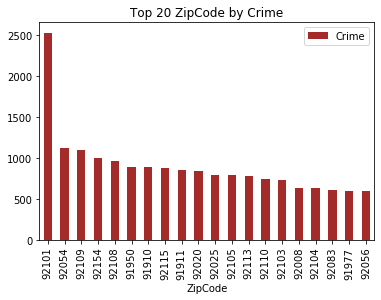

In [12]:
ALC_groups.sort_values(by=['Crime'], ascending=False)[:20].plot(kind="bar", color='Brown', title='Top 20 ZipCode by Crime')

In [13]:
alc_counts = SD_alc['Prem Zip'].value_counts()
alc_counts = alc_counts.to_frame()
alc_counts['License'] = alc_counts['Prem Zip']
alc_counts = alc_counts.drop(['Prem Zip'], axis=1)
alc_counts.head()

,License
92101,788
90069,296
92109,259
92037,244
92110,241


#### Visualization of the Top 20 Zip Codes with the Highest Counts of Alcohol License

This chart is sorted from largest alcohol license count to lowest and we have grabbed the top 20. We can see that the same zip code also has the most alcohol licenses.

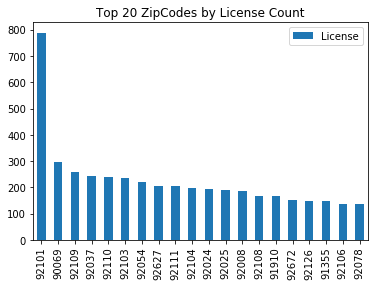

In [14]:
alc_counts[:20].plot(kind='bar', title='Top 20 ZipCodes by License Count')

#### Merge the Two DataFrames

In [15]:
# the 'Crime' column is the column of crime counts for each zip code
# the 'License' column has the counts of the License 
counts = pd.merge(ALC_groups, alc_counts, how ='outer', left_index=True, right_index=True).dropna()
counts.head()

,Crime,License
89119,1.0,1.0
90068,1.0,36.0
90069,1.0,296.0
91901,115.0,50.0
91902,82.0,32.0


#### A scatterplot of crime counts plotted against license counts

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


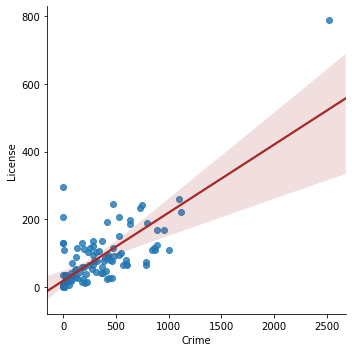

In [16]:
sns.lmplot(x='Crime', y='License', data=counts, line_kws={'color': 'Brown'})

#### OLS Regression for Crime and Licenses
Through this we can see that when we can see that with a p-value of 0.000 and an alpha level of 0.01, we can say that 'License' can significantly predict 'Crime'. Using the R-Squared value, of 0.574, we can see that License and Crime rates are positively correlated, however it is not an extremely strong correlation either. 

In [17]:
outcome, predictor = patsy.dmatrices('Crime ~ License', counts)
mod = sm.OLS(outcome, predictor)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Crime   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     142.8
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           2.33e-21
Time:                        17:00:30   Log-Likelihood:                -743.13
No. Observations:                 108   AIC:                             1490.
Df Residuals:                     106   BIC:                             1496.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.6505     30.501      2.775      0.0

#### Visualization of the Counts of Specific Crimes
A bar graph was created to display and visualize the counts of the six category of crimes we are looking at. "THEFT/Larceny" has the largest number of crimes (9,271), "ASSAULT" has the second largest number (7,348), and "VEHICLE BREAK-IN/THEFT" has the third largest number of crimes(6,782).

It is interesting that "THEFT/LARCENY" has the greatest number of crimes associated with this category, as the previous studies used for the background and prior work focused their research on assault related crimes.

In [18]:
# Drop all irrelevant columns of df_ALC and create new crime dataframe
df_Crime = df_ALC.drop(columns=['Description', 'ZipCode' , 'ALC_related'], axis = 1)
# Groupby crime and create new column that counts each crime
df_Crime['Count'] = df_Crime.groupby('Crime')['Crime'].transform('count')
df_Crime = df_Crime.groupby(['Crime']).size()
df_Crime.head()

Crime
ASSAULT                7348
DUI                    2495
MOTOR VEHICLE THEFT    4805
THEFT/LARCENY          9271
VANDALISM              4537
dtype: int64

Text(0, 0.5, 'Crime')

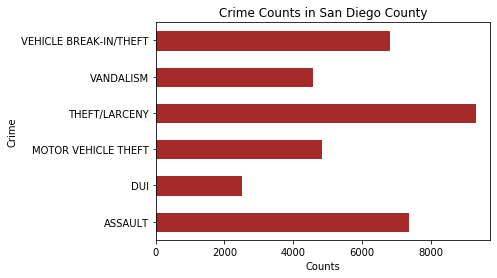

In [19]:
#Creates the bar graph 
Crime_Counts = df_Crime.plot.barh(title = 'Crime Counts in San Diego County', x='Crime', y='Count', rot=0, Color = 'Brown')
Crime_Counts.set_xlabel("Counts")
Crime_Counts.set_ylabel("Crime")

#### Specific Crimes Per Zipcode
We can use the groupby function to organize by specific crimes within each zipcode. This will allow us to analyze the relationship between the number of alcohol licenses and these specific crimes.

In [20]:
#Groupby ZipCode and drop all unnecessary columns 
ALC_groups = df_ALC.groupby(df_ALC['ZipCode']).count()
ALC_groups = ALC_groups.drop(['Description', 'ALC_related'], axis=1)
ALC_groups[ALC_groups['Crime'] > 0]

ALC_crimes = df_ALC.groupby(['ZipCode', 'Crime']).size()
ALC_crimes_df = pd.DataFrame(ALC_crimes)
ALC_crimes_df.head(15)

0
ZipCode Crime                     
89119   THEFT/LARCENY            1
90068   THEFT/LARCENY            1
90069   THEFT/LARCENY            1
91901   ASSAULT                 32
        DUI                      3
        MOTOR VEHICLE THEFT     22
        THEFT/LARCENY           28
        VANDALISM               13
        VEHICLE BREAK-IN/THEFT  17
91902   ASSAULT                 17
        MOTOR VEHICLE THEFT     15
        THEFT/LARCENY            7
        VANDALISM                8
        VEHICLE BREAK-IN/THEFT  35
91905   ASSAULT                  2

#### Assault Crimes Analysis

Looking deeper into the crime data, we can perform a much more specific analysis on certain types of crime. Here we will be performing a similar analysis to the one we performed above but on Assault crimes alone. According to the sources we provided in the background for this project, alcohol outlet density should be significantly associated with violent crimes (Alcohol Outlets and Violent Crime in Washington D.C.). We can perform OLS Regression on the number of assault crimes and alcohol licenses in each zipcode in order to see if that claim holds up.

First we must create a new dataframe that contains only the amount of assault crimes in each neighborhood.

In [21]:
#Drop all entries in our dataframe that are unrelated to assault.
crime_drop = df_ALC.index[df_ALC['Crime'] != 'ASSAULT'].tolist()
Assault_df = df_ALC.drop(crime_drop, axis=0)
#Group the remaining data by zipcode
ALC_assault = Assault_df.groupby(['ZipCode']).size()
ALC_assault_df = pd.DataFrame(ALC_assault)
ALC_assault_df.head(10)

,0
ZipCode,
91901,32
91902,17
91905,2
91906,9
91910,203
91911,158
91913,27
91914,16
91915,15


#### Visualization of the first 20 ZipCodes in our data and their number of assaults

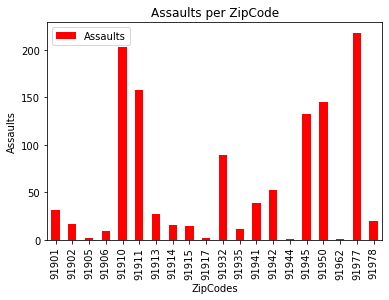

In [22]:
ag = ALC_assault_df[:20].plot(kind='bar', title='Assaults per ZipCode',color='Red')
ag.set_xlabel("ZipCodes")
ag.set_ylabel("Assaults")
ag.legend(["Assaults"])

We then can combine the dataframe that contains the number of assaults per zipcode with the license counts per zipcode so that we can later perform OLS Regression on this data.

In [23]:
Assault_counts = pd.merge(ALC_assault_df, alc_counts, how ='outer', left_index=True, right_index=True).dropna()
Assault_counts.columns = ['AssaultCounts', 'LicenseCounts']
Assault_counts.head()

,AssaultCounts,LicenseCounts
91901,32.0,50.0
91902,17.0,32.0
91905,2.0,4.0
91906,9.0,13.0
91910,203.0,167.0


#### A scatterplot of assault crimes plotted against license counts

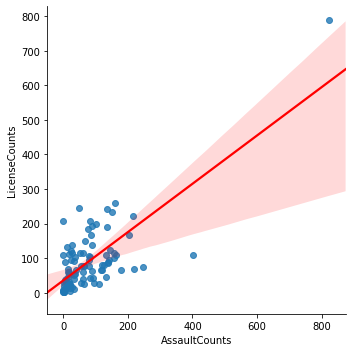

In [24]:
sns.lmplot(x='AssaultCounts', y='LicenseCounts', data=Assault_counts, line_kws={'color': 'red'})

#### OLS Regression for Assault Crimes and Licenses

We can see that performing an OLS Regression on assault crime counts and license counts gives us a p-value of 0.000 and an R_Squared value of 0.563. This is very similar to the results for OLS Regression when considering all crimes regardless of type. This means that we can say that based on the p-value, 'LicenseCounts' can predict 'AssaultCounts' as we reject the null hypothesis as our p-value is below 0.05. Additionally, based on the R-Squared value, we can see that, much like with all crimes, there is a positive correlation between the two, albeit not a strong one. 

In regards to claims made by the sources in the background that there is a significant association between alcohol outlet density and violent crimes, we can tell from this OLS Regression that there is some truth to this claim. There definitely appears to be a positive correlation between the two, however, the signifigance of this correlation may not be as great as the source claims. Overall however, we do observe some kind of positive correlation between violent assault crimes and alcohol license counts. And this discrepancy in results could come from a bias in the sources' data, where the data may have been effected by ecological fallacy.

In [25]:
as_outcome, as_predictor = patsy.dmatrices('AssaultCounts ~ LicenseCounts', Assault_counts)
as_mod = sm.OLS(as_outcome, as_predictor)
as_res = as_mod.fit()
print(as_res.summary())

                            OLS Regression Results                            
Dep. Variable:          AssaultCounts   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     119.8
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           2.10e-18
Time:                        17:00:31   Log-Likelihood:                -535.90
No. Observations:                  95   AIC:                             1076.
Df Residuals:                      93   BIC:                             1081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.2878      9.643      0.548

#### DUI Crimes Analysis

While we have selected the crimes that seem the most related to alcohol, we can't be sure if all of the crimes in our dataset are actually related to alcohol or drinking in any way. However, we can be confident in our assumption that DUI crimes are related to alcohol/drinking. While DUI crimes include all kinds of substance abuse and not just alcohol, it can be assumed that there will be a higher correlation between license counts and DUI crimes than between license counts and all of the crimes at once.

In [26]:
#Drop all entries in our dataframe that are unrelated to DUI crime.
dui_drop = df_ALC.index[df_ALC['Crime'] != 'DUI'].tolist()
dui_df = df_ALC.drop(dui_drop, axis=0)
#Group the remaining data by zipcode
ALC_dui = dui_df.groupby(['ZipCode']).size()
ALC_dui_df = pd.DataFrame(ALC_dui)
#Merge with license count data
DUI_counts = pd.merge(ALC_dui_df, alc_counts, how ='outer', left_index=True, right_index=True).dropna()
DUI_counts.columns = ['DUICounts', 'LicenseCounts']
DUI_counts.head()

,DUICounts,LicenseCounts
91901,3.0,50.0
91910,73.0,167.0
91911,48.0,114.0
91913,19.0,16.0
91914,2.0,18.0


#### Visualization of the first 20 ZipCodes in our data and their number of DUIs

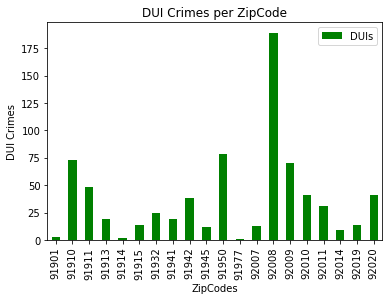

In [27]:
ag = ALC_dui_df[:20].plot(kind='bar', title='DUI Crimes per ZipCode',color='Green')
ag.set_xlabel("ZipCodes")
ag.set_ylabel("DUI Crimes")
ag.legend(["DUIs"])

#### A scatterplot of DUI crimes plotted against license counts

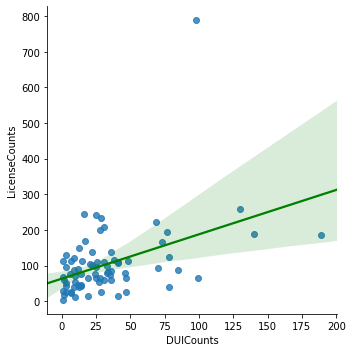

In [28]:
sns.lmplot(x='DUICounts', y='LicenseCounts', data=DUI_counts, line_kws={'color': 'green'})

#### OLS Regression for DUI Crimes and License

Performing this OLS Regression provides some surprising results. While we had expected there to be a stronger correlation between DUIs and Alcohol Licenses, we can actually see that with an R-squared value of around 0.184, there is only a weak positive correlation between the two. However, given that we have a p-value of 0.000, we can reject the null hypothesis and claim there to be some relation between the two.

These results may seem surprising at first, but they actually make sense. Just because someone purchased alcohol in a specific area doesn't mean that they got pulled over in that same area. It makes sense that we don't see a strong correlation between License counts and DUIs because presumably, by the time the intoxicated person has been pulled over and received the DUI, they have already left the area in which they got intoxicated in the first place. Based on this, it is not surprising that we don't see an extremely strong correlation between the two values.

In [29]:
dui_outcome, dui_predictor = patsy.dmatrices('DUICounts ~ LicenseCounts', DUI_counts)
dui_mod = sm.OLS(dui_outcome, dui_predictor)
dui_res = dui_mod.fit()
print(dui_res.summary())

                            OLS Regression Results                            
Dep. Variable:              DUICounts   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     16.70
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           0.000110
Time:                        17:00:32   Log-Likelihood:                -368.69
No. Observations:                  76   AIC:                             741.4
Df Residuals:                      74   BIC:                             746.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.3420      5.206      3.331

# Ethics & Privacy

The data was provided by websites online however it can be utilized as long as credit and citations are provided, as done in the 'Datasets' section. On top of that, as long as the study of “human subjects” have given informed consent and has a clear understanding we are allowed to use the data/dataset. Since we are using crime data it would be best and more ethical to ensure there is no identifiable information in our datasets. We've removed anything we considered to be 'identifiable' to ensure it followed the 'Safe Harbor' methods. We removed addresses from both datasets as well as times and dates. However, we kept the zipcodes with the full 5 digits. This was due to the fact that without using the full 5 digits, our analyses would not have given significant results. 

Collective Bias: Additionally, since we are using crime data, it can lead to unintended biases. For example, minorities are more likely to be targeted as perpetrators of crimes. Additionally, many minorities live in 'poorer' neighborhoods and would be clumped up geographically. So, when we are analyzing our data we were aware that it might pick up on those biases more than the areas which sell alcohol. 

In order to mitigate these issues, in our presentation and communication step (the 'Conclusion & Discussion' section), we would include possible biases in the dataset as sort of a 'disclaimer' before presenting our results. By presenting these potential biases, the readers would at least be informed about these biases and could take them into account with our results.



# Conclusion & Discussion

In conclusion, we did see a positive correlation between crime rates and alcohol licenses in specific zip code. Our graphs indicate a positive r-squared value although the correlation is not extremely strong. This aligns with our initial hypothesis. Something really interesting that we saw was the zip code with the most crime rates (by a long shot) aligns with the zip code with the most alcohol licenses. The zip code 92101 is the zip code region corresponding to the Gaslamp Quarter in San Diego. This area is known to have a lot of bars/clubs so it makes sense that there is a lot of alcohol licenses there. What’s interesting to note is that this region has more than twice the amount of crimes as any other region in San Diego. This leads us to believe that there is some factor or association heavily between alcohol and crime in this region but we cannot state causation.

Our analysis also shows the different types of crimes in each region as well as how they correlate to alcohol license counts. According to a study conducted in Washington, DC in 2000 claimed that “alcohol outlet density is significantly associated with the violent crimes” (Alcohol Outlets and Violent Crime in Washington DC). As we performed our analysis, we learned that there is definitely some merit to this claim, but it is still not certain as to how significant the correlation actually is, as we do not wish to make too many assumptions about the data. Accordingly, as seen in the bar graph of the crimes recorded in San Diego County, the largest number of crimes that occurred were categorized as “theft/larceny” with “assault” having the second largest number of crimes recorded. Although this does not support the previous research that was performed, it is supportive of our analysis as the correlation is not as significant as we initially predicted based on previous research in Washington. Furthermore, the research performed in Washington may be biased as the locations in which they were examining alcohol outlets is unsure; it could have been in impoverished neighborhoods that have a significant number of violent crimes.

We also performed specified analysis on DUI crimes in particular. Our initial hypothesis in this case was that there would be a strong correlation between alcohol license counts and DUI offenses, but we were surprised to find that this was not necessarily the case. Through OLS Regression we learned that while there was a positive correlation between alcohol license density and recorded DUIs, that this correlation was not as strong as one would expect. This could be a result of DUI offenders being caught after they had already driven away from where they got intoxicated at. In our crime data, we found that the zip code of 92008 contained the most DUI offenses, and this zip code corresponds to the city of Carlsbad. While we may not be able to make too many assumptions from this, it is of note that there is a large section of the 5-Freeway that runs through this zip code, so the high number of DUIs in that region could come from people commuting along this freeway after a night of partying or drinking. Additionally, it may be the case that many of these DUI cases were not rooted in the offender being drunk at all. They may have been high off of some other substance, as all accounts of inebriated driving would fall under the umbrella of DUIs. Overall, while we may not have received the results that we expected to find going into this analysis of DUI crimes, the results did actually make sense once we started to look beyond just the numbers alone and move past our initial expectations. 

One thing to note, is that there may have been potential biases in our datasets and analyses. Since we were using crime data, it could have led to unintended biases. We have seen that minorities generally live in 'poorer' neighborhoods and could have higher levels of crime. When we are analyzing our data we were aware that it might pick up on those biases more than the areas which sell alcohol so it is important to mention this in our discussions of our results.

The limitations of our analysis included time restriction: we were only able to use crime data from a certain time frame, 8 weeks prior to the day we pulled the data (March 9 2020). This is to limit the size of our data because we wanted to work with current but also most significant crime data. We also restricted ourselves to only active licenses, not looking at licenses that were active currently but disabled during the past 8 weeks. We also had restrictions of only being able to cluster by zip code, realistically we would have liked to use streets or smaller regions to analyze the crimes/alcohol licenses.



# Team Contributions
 - Background -- Brianna and Nicholas 
 - Datasets Section -- Neghena 
 - Alcohol License Cleaning -- Neghena, Richard, and Jie
 - Crime Data Cleaning -- Nicholas and Brianna
 - Crime Counts x License Counts Analysis -- Neghena, Richard, and Jie
 - Crime Types Analysis -- Brianna and Nicholas 
 - Ethics & Privacy -- Richard 
 - Conclusion -- Everyone